# Magnetic fields in CRPropa

This notebook provides a general overview of magnetic fields in CRPropa.
They all inherit from the `MagneticField` class and share the method `getField(position)`, which returns $\vec{B}$ at a given position $\vec{r}$.


Some typical uses are illustrated.

## Homogeneous magnetic fields

This is the simplest type of magnetic field consisting of a global field with the same strength and direction everywhere.

In [53]:
from crpropa import *

homogeneousB = UniformMagneticField(Vector3d(1e-10, 0, 0))

# evaluate at a given position
B1 = homogeneousB.getField(Vector3d(10 * Mpc, 0, 0))
B2 = homogeneousB.getField(Vector3d(0, 1. * Gpc, 0))

print('B1 = ', B1)
print('B2 = ', B2)

B1 =  Vector(1E-10, 0, 0)
B2 =  Vector(1E-10, 0, 0)


## Turbulent magnetic fields

Turbulent magnetic fields are stochastic zero-mean Gaussian random fields. 
They are computed in CRPropa using a grid-based method that samples this field in Fourier space and then transformed to real space. This is done using the library (FFTW3)[https://www.fftw.org/]. While CRPropa works without this library, the generation of turbulent fields necessarily require this software, especifically FFTW3f (for float precision).

Below two examples are studied. 

### Generating turbulent grids



In [54]:
randomSeed = 42 # to ensure reproducibility of the simulation
Brms = 1e-10 
gridOrigin = Vector3d(0, 0, 0)

scaleMinimum1 = 200 * kpc
scaleMaximum1 = 5 * Mpc
spectralIndex1 = -2.
gridSpacing1 = 100 * kpc
gridCells1 = 50
turbulentSpectrum1 = SimpleTurbulenceSpectrum(Brms, scaleMinimum1, scaleMaximum1, spectralIndex1)
gridProperties1 = GridProperties(gridOrigin, gridCells1, gridSpacing1)
turbulentB1 = SimpleGridTurbulence(turbulentSpectrum1, gridProperties1, randomSeed)
lB1 = turbulentB1.getCorrelationLength() / Mpc

scaleMinimum2 = 200 * kpc
scaleMaximum2 = 5 * Mpc
spectralIndex2 = -0.01
gridSpacing2 = 100 * kpc
gridCells2 = 50
turbulentSpectrum2 = SimpleTurbulenceSpectrum(Brms, scaleMinimum2, scaleMaximum2, spectralIndex2)
gridProperties2 = GridProperties(gridOrigin, gridCells2, gridSpacing2)
turbulentB2 = SimpleGridTurbulence(turbulentSpectrum2, gridProperties2, randomSeed)
lB2 = turbulentB2.getCorrelationLength() / Mpc

scaleMinimum3 = 200 * kpc
scaleMaximum3 = 5 * Mpc
spectralIndex3 = 2.
gridSpacing3 = 100 * kpc
gridCells3 = 50
turbulentSpectrum3 = SimpleTurbulenceSpectrum(Brms, scaleMinimum3, scaleMaximum3, spectralIndex3)
gridProperties3 = GridProperties(gridOrigin, gridCells3, gridSpacing3)
turbulentB3 = SimpleGridTurbulence(turbulentSpectrum3, gridProperties3, randomSeed)
lB3 = turbulentB3.getCorrelationLength() / Mpc

scaleMinimum4 = 200 * kpc
scaleMaximum4 = 5 * Mpc
spectralIndex4 = 4.
gridSpacing4 = 100 * kpc
gridCells4 = 50
turbulentSpectrum4 = SimpleTurbulenceSpectrum(Brms, scaleMinimum4, scaleMaximum4, spectralIndex4)
gridProperties4 = GridProperties(gridOrigin, gridCells4, gridSpacing4)
turbulentB4 = SimpleGridTurbulence(turbulentSpectrum4, gridProperties4, randomSeed)
lB4 = turbulentB4.getCorrelationLength() / Mpc

print('Fields:')
print('1 | alphaB = %+2.1f;  LB = %3.2f Mpc' % (spectralIndex1, lB1))
print('2 | alphaB = %+2.1f;  LB = %3.2f Mpc' % (spectralIndex2, lB2))
print('3 | alphaB = %+2.1f;  LB = %3.2f Mpc' % (spectralIndex3, lB3))
print('4 | alphaB = %+2.1f;  LB = %3.2f Mpc' % (spectralIndex4, lB4))

Fields:
1 | alphaB = -2.0;  LB = 0.15 Mpc
2 | alphaB = -0.0;  LB = 0.33 Mpc
3 | alphaB = +2.0;  LB = 1.30 Mpc
4 | alphaB = +4.0;  LB = 1.88 Mpc


### Processing the generated turbulent grids

Select a few positions on a plane to plot a slice of the turbulent grid.

In [ ]:
import numpy as np

outputFile1 = 'sim/turbulentGrid1.txt'
outputFile2 = 'sim/turbulentGrid2.txt'
outputFile3 = 'sim/turbulentGrid3.txt'
outputFile4 = 'sim/turbulentGrid4.txt'

# save to file (can be easily loaded later)
dumpGridToTxt(turbulentB1.getGrid(), outputFile1)
dumpGridToTxt(turbulentB2.getGrid(), outputFile2)
dumpGridToTxt(turbulentB3.getGrid(), outputFile3)
dumpGridToTxt(turbulentB4.getGrid(), outputFile4)


#
def gridToNumPyArray(turbulentGrid):
	"""
	Converts the object into a numpy array.
	"""
	nx = turbulentGrid.getGrid().getNx()
	ny = turbulentGrid.getGrid().getNy()
	nz = turbulentGrid.getGrid().getNz()

	# get the grid as a NumPy array
	B = np.zeros((nx, ny, nz))
	for i in range(nx):
		for j in range(ny):
			for k in range(nz):
				B[i, j, k] = turbulentGrid.getGrid().get().get(i, j, k).getR()

	return B

B1 = gridToNumPyArray(turbulentB1)
B2 = gridToNumPyArray(turbulentB2)
B3 = gridToNumPyArray(turbulentB3)
B4 = gridToNumPyArray(turbulentB4)


### Plotting

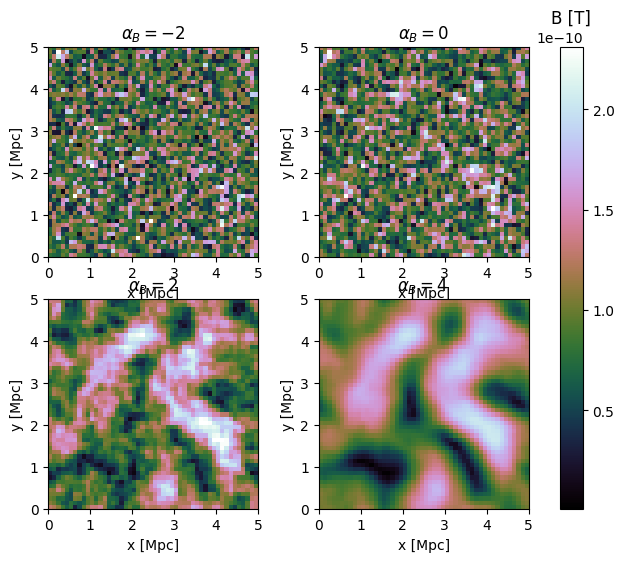

In [56]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


Bmin = np.amin([np.amin(B1), np.amin(B2), np.amin(B3), np.amin(B4)])
Bmax = np.amin([np.amax(B1), np.amax(B2), np.amax(B3), np.amax(B4)])

plotOpts = {'extent': (0., 5., 0., 5.), 'cmap': 'cubehelix', 'vmin': Bmin, 'vmax': Bmax}

fig, ax = plt.subplots(2, 2)
fig.set_figheight(6)
fig.set_figwidth(8)

im1 = ax[0, 0].imshow(B1[:, :, 25], **plotOpts)
ax[0, 0].set_title('$\\alpha_B = -2$')
ax[0, 0].set_xlabel('x [Mpc]')
ax[0, 0].set_ylabel('y [Mpc]')

im2 = ax[0, 1].imshow(B2[:, :, 25], **plotOpts)
ax[0, 1].set_title('$\\alpha_B = 0$')
ax[0, 1].set_xlabel('x [Mpc]')
ax[0, 1].set_ylabel('y [Mpc]')

im3 = ax[1, 0].imshow(B3[:, :, 25], **plotOpts)
ax[1, 0].set_title('$\\alpha_B = 2$')
ax[1, 0].set_xlabel('x [Mpc]')
ax[1, 0].set_ylabel('y [Mpc]')

im4 = ax[1, 1].imshow(B4[:, :, 25], **plotOpts)
ax[1, 1].set_title('$\\alpha_B = 4$ ')
ax[1, 1].set_xlabel('x [Mpc]')
ax[1, 1].set_ylabel('y [Mpc]')


# # fig.subplots_adjust(right=0.8)
cb = fig.colorbar(im1, ax = ax)
cb.ax.set_title('B [T]')

plt.show()

## Combining magnetic fields


CRPropa allows magnetic fields to be combined.
This is done through the `MagneticFieldList` class, which is essentially keeps a list of fields and adds the values of each $\vec{B}_k$ at a region of interest $\vec{r}$.

### Creating combined fields

We will take one of the turbulent fields from above and add a homogeneous field on top of it.

In [57]:
homogeneousB1 = UniformMagneticField(Vector3d(1e-6, 0, 0))
homogeneousB2 = UniformMagneticField(Vector3d(1e-13, 0, 0))

combinedB1 = MagneticFieldList()
combinedB1.addField(turbulentB3)
combinedB1.addField(homogeneousB1)

combinedB2 = MagneticFieldList()
combinedB2.addField(turbulentB3)
combinedB2.addField(homogeneousB2)


### Sampling the combined field for plotting

In [58]:
xv = np.linspace(0., 5., 20, endpoint = True) * Mpc
yv = zv = xv

#
def sampleField(magneticField, X, Y, Z):
	"""
	Sample the combined field.
	"""
	nx = len(X)
	ny = len(Y)
	nz = len(Z)

	# get the grid as a NumPy array
	B = np.zeros((nx, ny, nz))
	for i in range(nx):
		for j in range(ny):
			for k in range(nz):
				B[i, j, k] = magneticField.getField(Vector3d(X[i], Y[j], Z[k])).getR()

	return B

B1 = sampleField(combinedB1, xv, yv, zv)
B2 = sampleField(combinedB2, xv, yv, zv)



### Plotting

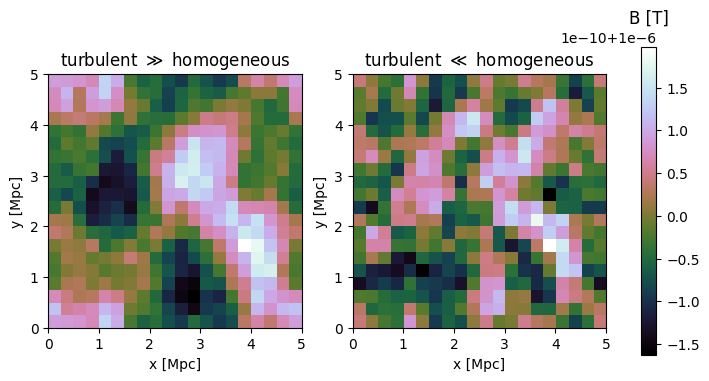

In [59]:
plotOpts = {'extent': (0., 5., 0., 5.), 'cmap': 'cubehelix'}

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(4)
fig.set_figwidth(9)

im1 = ax1.imshow(B1[:, :, 10], **plotOpts)
ax1.set_title('turbulent $\\gg$ homogeneous')
ax1.set_xlabel('x [Mpc]')
ax1.set_ylabel('y [Mpc]')

im2 = ax2.imshow(B2[:, :, 10], **plotOpts)
ax2.set_title('turbulent $\\ll$ homogeneous')
ax2.set_xlabel('x [Mpc]')
ax2.set_ylabel('y [Mpc]')

# # fig.subplots_adjust(right=0.8)
cb = fig.colorbar(im1, ax = (ax1, ax2))
cb.ax.set_title('B [T]')

plt.show()

## Magnetic fields from grids

Quite often an user might want to load their own magnetic field model, which is often available as a grid.
This can be, for example, a field obtained from cosmological simulations of structure formation.

CRPropa provides this flexibility by enabling a file to be loaded containing the information to be loaded. This file should be C-ordered, with the slowest-running index corresponding to the x coordinate, and the fastest one to the z coordinate, as shown in the pseudo-code below
```
for i in coordinatesX
	for j in coordinatesY
		for k in coordinatesZ
			grid[i, j, k] = Vector3d(Bx, By, Bz)
```


To illustrate this, the turbulent grids already generated earlier will be used.

In [60]:

gridOrigin = Vector3d(0, 0 , 0)

gridCells = 50
gridSpacing = 100 * kpc
gridProperties = GridProperties(gridOrigin, gridCells3, gridSpacing3)

turbulentGrid3 = Grid3f(gridProperties)
turbulentGrid4 = Grid3f(gridProperties)

loadGridFromTxt(turbulentGrid3, outputFile3)
loadGridFromTxt(turbulentGrid4, outputFile4)

gridB3 = MagneticFieldGrid(turbulentGrid3)
gridB4 = MagneticFieldGrid(turbulentGrid4)


### Grid limits

Grids are finite-sized. Sometimes the function `getField()` attempts to retrieve a magnetic-field value outside the grid.
For instance, for the grids loaded above its size is fixed to 5 Mpc. If we try to get the magnetic field outside the box whose coordinates are $x \in [0, 5] \; \text{Mpc}$ (same for y and z), the value at the edge of the box is returned, as shown below.

In [61]:
print(gridB4.getField(Vector3d(10. * Mpc, 0, 0)))
print(gridB4.getField(Vector3d(5.0 * Mpc, 0, 0)))
print(gridB4.getField(Vector3d(4.9 * Mpc, 0, 0)))

Vector(-1.00153E-11, -1.32384E-11, -6.26068E-12)
Vector(-1.00153E-11, -1.32384E-11, -6.26068E-12)
Vector(-1.14093E-11, 7.98304E-12, 3.8903E-12)


In this case, boundary conditions can be used.
A new magnetic field object, `PeriodicMagneticField`, periodically repeats the grid and avoids the usage of the field at the edge of the box.
An example is shown below.

In [62]:
periodicGridB = PeriodicMagneticField(gridB4, Vector3d(1000, 1000, 1000) * Mpc)

print(periodicGridB.getField(Vector3d(10. * Mpc, 0, 0)))
print(periodicGridB.getField(Vector3d(5.0 * Mpc, 0, 0)))
print(periodicGridB.getField(Vector3d(4.9 * Mpc, 0, 0)))
print(periodicGridB.getField(Vector3d(9.9 * Mpc, 0, 0)))

Vector(-1.00153E-11, -1.32384E-11, -6.26068E-12)
Vector(-1.00153E-11, -1.32384E-11, -6.26068E-12)
Vector(-1.14093E-11, 7.98304E-12, 3.8903E-12)
Vector(-1.14093E-11, 7.98304E-12, 3.8903E-12)
